In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-03-10 14:38:27.255537: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 14:38:27.255672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 14:38:27.528203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/stock-headlines/Stock Headlines.csv


In [2]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.4 MB/s eta 0:00:0000:010:01


In [3]:
from sentence_transformers import SentenceTransformer

In [4]:
df = pd.read_csv("/kaggle/input/stock-headlines/Stock Headlines.csv",encoding = 'ISO-8859-1')

In [5]:
df.shape

(4101, 27)

In [6]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

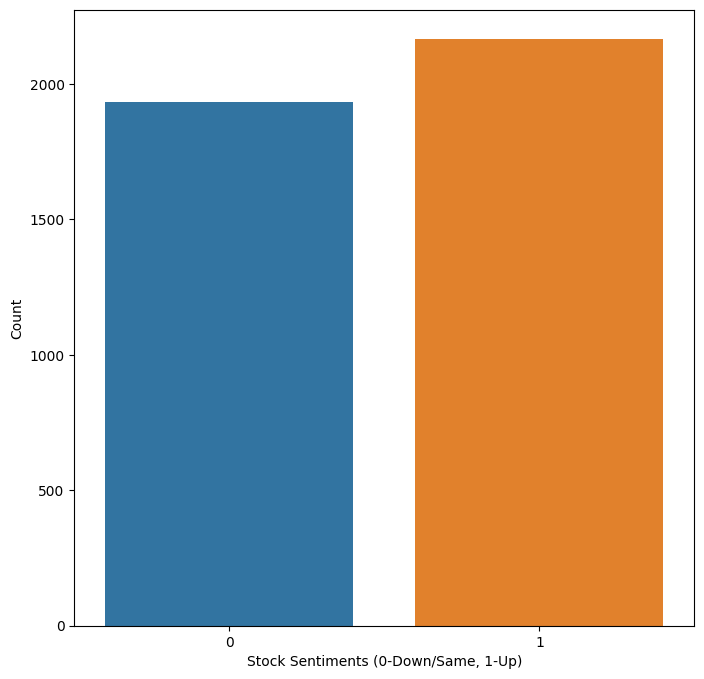

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x="Label",data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [8]:
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [9]:
df.dropna(inplace=True)

In [10]:
data=df

In [11]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [12]:
label = test["Label"]

In [13]:
data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

In [14]:
test = test.iloc[:,2:27]
test.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

In [15]:
list1= [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns=new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [16]:
list1= [i for i in range(25)]
new_Index = [str(i) for i in list1]
test.columns=new_Index
test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3723,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll One in Germans would join anti Muslim ...,UK royal family s Prince Andrew named in US la...,Some asylum seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,cars set alight during French New Year,Salaries for top CEOs rose twice as fast as av...,Norway violated equal pay law judge says Jud...,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of ...,The year was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution No More Harvestin...,Authorities Pull Plug on Russia s Last Politic...
3724,Moscow gt Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,After Decades of Searching the Causeway for t...,India lost tigers in,...,The Islamic State has approved a budget o...,Iceland To Withdraw EU Application Lift Capit...,Blackfield Capital Founder Goes Missing The v...,Rocket stage crashes back to Earth in rural Ch...,Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM says ...,Vietnamese jets join search for missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
3725,US oil falls below a barrel,Toyota gives away fuel cell patents to b...,Young Indian couple who had been granted polic...,A senior figure in Islamic States self declare...,Fukushima rice passes radiation tests for st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,Mexican missing students mayor s wife charged...,New York Times reporter James Risen refused on...,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon launch and recovery has been a...,CNN Americans charged in botched Gambia coup,Islamic State Police Official Beheaded,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,Tests over India set to make the iris of bigg...
3726,Shots fired at French magazine HQ,of Bibi Netanyahus Campaign Funds From U S,ISIS behead street magician for entertaining c...,Denmark sets new world record in renewable ene...,ISIS Closes Schools In Syria Leaving C...,The European Union wants Turkey to explain how...,people have died in a shooting at the headq...,Most Earth like planet ever discovered could b...,New questions raised about U S Saudi relation...,Massive hunt underway for gunmen in Paris terr...,...,Discovery of witnesss mutilated body feeds cla...,Radical Islam a growing threat to sub Saharan ...,Tony Blair may face war crime charges over I...,Benjamin Netanyahu says settlements unlikely t...,Tasmania moves to allow corporations to sue pr...,Indonesia search chief Tail section of AirAsi...,North Korean Defector Bureau Hackers lo...,Female suicide bomber attacks police station i...,IS to turn Syria schools into religious indoct...,Ebola vaccine trials in Halifax so far a success
3727,New Charlie Hebdo issue to come out next week ...,Ahmed Merabet Cop Killed In Paris Attacks Wa...,Youngest S

In [17]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft


In [18]:
for index in new_Index:
    test[index]=test[index].str.lower()
test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3723,most cases of cancer are the result of sheer b...,iran dismissed united states efforts to fight ...,poll one in germans would join anti muslim ...,uk royal family s prince andrew named in us la...,some asylum seekers refused to leave the bu...,pakistani boat blows self up after india navy ...,sweden hit by third mosque arson attack in a week,cars set alight during french new year,salaries for top ceos rose twice as fast as av...,norway violated equal pay law judge says jud...,...,ukrainian minister threatens tv channel with c...,palestinian president mahmoud abbas has entere...,israeli security center publishes names of ...,the year was the deadliest year yet in sy...,a secret underground complex built by the nazi...,restrictions on web freedom a major global iss...,austrian journalist erich mchel delivered a pr...,thousands of ukraine nationalists march in kiev,chinas new years resolution no more harvestin...,authorities pull plug on russia s last politic...
3724,moscow gt beijing high speed train will reduc...,two ancient tombs were discovered in egypt on ...,china complains to pyongyang after n korean so...,scotland headed towards being fossil fuel free...,prime minister shinzo abe said monday he will ...,sex slave at centre of prince andrew scandal f...,gay relative of hamas founder faces deportatio...,the number of female drug addicts in iran has ...,after decades of searching the causeway for t...,india lost tigers in,...,the islamic state has approved a budget o...,iceland to withdraw eu application lift capit...,blackfield capital founder goes missing the v...,rocket stage crashes back to earth in rural ch...,dead as aircraft bombs greek tanker in libya...,belgian murderer frank van den bleeken to die ...,czech president criticizes ukrainian pm says ...,vietnamese jets join search for missing f...,france seeks end to russia sanctions over ukraine,china scraps rare earths caps
3725,us oil falls below a barrel,toyota gives away fuel cell patents to b...,young indian couple who had been granted polic...,a senior figure in islamic states self declare...,fukushima rice passes radiation tests for st ...,nearly all spanish parties guilty of financial...,king abdullah to abdicate saudi throne,taliban commander caught networking on linkedin,mexican missing students mayor s wife charged...,new york times reporter james risen refused on...,...,thousands of indians have fled from their home...,turkey sacks judges who oversaw erdogan corrup...,spacex falcon launch and recovery has been a...,cnn americans charged in botched gambia coup,islamic state police official beheaded,libya bans palestinians from country to preven...,a judicial inquiry was opened in france on mon...,video has captured the moment a cameraman was ...,syria has complained to the united nations tha...,tests over india set to make the iris of bigg...
3726,shots fired at french magazine hq,of bibi netanyahus campaign funds from u s,isis behead street magician for entertaining c...,denmark sets new world record in renewable ene...,isis closes schools in syria leaving c...,the european union wants turkey to explain how...,people have died in a shooting at the headq...,most earth like planet ever discovered could b...,new questions raised about u s saudi relation...,massive hunt underway for gunmen in paris terr...,...,discovery of witnesss mutilated body feeds cla...,radical islam a growing threat to sub saharan ...,tony blair may face war crime charges over i...,benjamin netanyahu says settlements unlikely t...,tasmania moves to allow corporations to sue pr...,indonesia search chief tail section of airasi...,north korean defector bureau hackers lo...,female suicide bomber attacks police station i...,is to turn syria schools into religious indoct...,ebola vaccine trials in halifax so far a success
3727,new charlie hebdo issue to come out next week ...,ahmed merabet cop killed in paris attacks wa...,youngest s

In [19]:
" ".join(str(x) for x in data.iloc[0,0:25])

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [20]:
train_text = [' [SEP] '.join(row[0:25]) for _, row in data.iterrows()]
test_text = [' [SEP] '.join(row[0:25]) for _, row in test.iterrows()]

In [21]:
train_text[0]

'a  hindrance to operations   extracts from the leaked reports [SEP] scorecard [SEP] hughes  instant hit buoys blues [SEP] jack gets his skates on at ice cold alex [SEP] chaos as maracana builds up for united [SEP] depleted leicester prevail as elliott spoils everton s party [SEP] hungry spurs sense rich pickings [SEP] gunners so wide of an easy target [SEP] derby raise a glass to strupar s debut double [SEP] southgate strikes  leeds pay the penalty [SEP] hammers hand robson a youthful lesson [SEP] saints party like it s      [SEP] wear wolves have turned into lambs [SEP] stump mike catches testy gough s taunt [SEP] langer escapes to hit     [SEP] flintoff injury piles on woe for england [SEP] hunters threaten jospin with new battle of the somme [SEP] kohl s successor drawn into scandal [SEP] the difference between men and women [SEP] sara denver  nurse turned solicitor [SEP] diana s landmine crusade put tories in a panic [SEP] yeltsin s resignation caught opposition flat footed [SEP] 

In [22]:
test_text[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  [SEP] iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  [SEP] poll  one in   germans would join anti muslim marches [SEP] uk royal family s prince andrew named in us lawsuit over underage sex allegations [SEP] some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   [SEP] pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistan

In [23]:
model_name = 'distiluse-base-multilingual-cased'
model = SentenceTransformer(model_name)

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [24]:
sentence_embeddings = model.encode(train_text)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

In [25]:
similarity = tf.keras.losses.cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])
print("Benzerlik:", similarity.numpy()[0])

Benzerlik: -0.64940375


In [26]:
test_dataset = model.encode(test_text)

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [99]:
randomclassifier=RandomForestClassifier(n_estimators=250,criterion='entropy')
randomclassifier.fit(sentence_embeddings,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sentence_transformers import SentenceTransformer

In [76]:
# Optimizer ve learning rate scheduler tanımlama
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [91]:
# Sinir ağı modelini oluştur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(sentence_embeddings.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Reshape((1, 128)),
    tf.keras.layers.Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Bidirectional(LSTM(128, activation='relu', return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(LSTM(256, activation='relu', return_sequences=False)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
# Modeli derle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
model.fit(sentence_embeddings, train["Label"], epochs=200, batch_size=80)

Epoch 1/200
36/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4988 - loss: 0.6929

W0000 00:00:1710082819.643024     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 220ms/step - accuracy: 0.5049 - loss: 0.6927
Epoch 2/200
37/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5274 - loss: 0.6917

W0000 00:00:1710082830.400915     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5270 - loss: 0.6918
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5293 - loss: 0.6915
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 0.6921
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5256 - loss: 0.6920
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 0.6918
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5146 - loss: 0.6933
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5283 - loss: 0.6916
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5226 - loss: 0.6921
Epoch 10/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 0.6907
Epoch 11/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5233 - loss: 0.6922
Epoch 12/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5347 - loss: 0.6911
Epoch 13/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5284 - l

In [93]:
# Test verisi üzerinde tahminler yapma
predictions = model.predict(test_dataset)
predictions = [1 if p > 0.5 else 0 for p in predictions]

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


In [94]:
# Değerlendirme
matrix = confusion_matrix(label, predictions)
print(matrix)
score = accuracy_score(label, predictions)
print("Doğruluk:", score)
report = classification_report(label, predictions)
print(report)

[[158  28]
 [ 41 151]]
Doğruluk: 0.8174603174603174
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       186
           1       0.84      0.79      0.81       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



In [100]:
Forest = randomclassifier.predict(test_dataset)

In [101]:
matrix=confusion_matrix(label,Forest)
print(matrix)
score=accuracy_score(label,Forest)
print(score)
report=classification_report(label,Forest)
print(report)

[[139  47]
 [  8 184]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.95      0.75      0.83       186
           1       0.80      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

